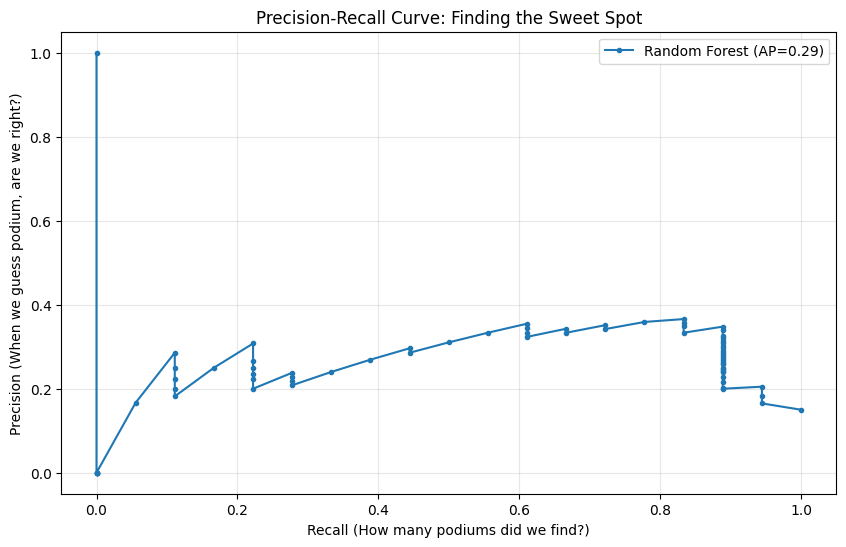

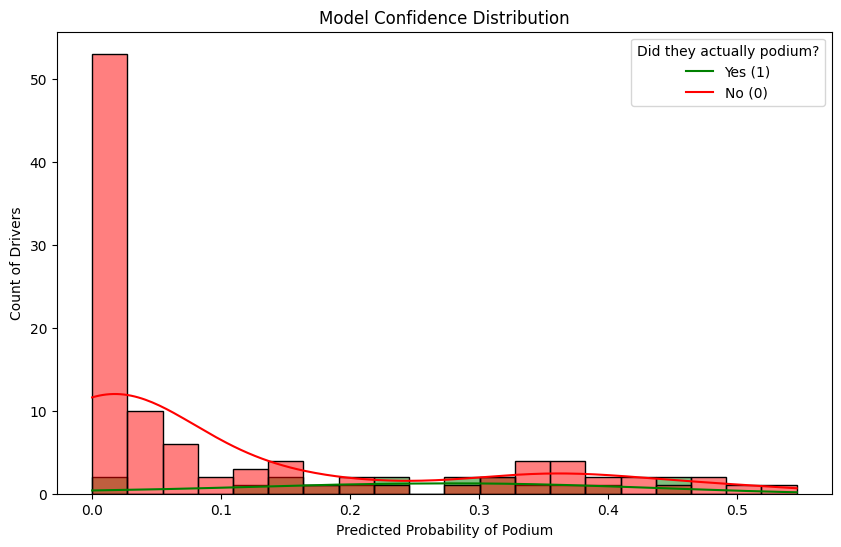

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
import joblib
import os

DATA_FILE = "../data/processed/improved_feature_engineered_data.csv"
MODEL_PATH = "../src/models/improved_podium_model.pkl"

df = pd.read_csv(DATA_FILE)
model = joblib.load(MODEL_PATH)

# Test set 
SPLIT_ROUND = 19
test_mask = (df['Year'] == 2024) & (df['RoundNumber'] >= SPLIT_ROUND)

# Features that I want to add 
non_features = ['Year', 'RoundNumber', 'FullName', 'EventName', 'TeamName',
                'RacePos', 'Points', 'Laps', 'FinishedRace', 
                'IsRaceWinner', 'IsPodium', 'Time', 'Driver', 'Constructor',
                'GridPosition', 'QualyPos']
features = [c for c in df.columns if c not in non_features]

X_test = df[test_mask][features]
y_test = df[test_mask]['IsPodium']
y_scores = model.predict_proba(X_test)[:, 1]

# Precission Model 
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'Random Forest (AP={avg_precision:.2f})')
plt.xlabel('Recall (How many podiums did we find?)')
plt.ylabel('Precision (When we guess podium, are we right?)')
plt.title('Precision-Recall Curve: Finding the Sweet Spot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Probability Histogram 
# Confidentiality of the model
results_df = pd.DataFrame({'Actual': y_test, 'Probability': y_scores})

plt.figure(figsize=(10, 6))
sns.histplot(data=results_df, x='Probability', hue='Actual', bins=20, kde=True, palette={0: "red", 1: "green"})
plt.title('Model Confidence Distribution')
plt.xlabel('Predicted Probability of Podium')
plt.ylabel('Count of Drivers')
plt.legend(title='Did they actually podium?', labels=['Yes (1)', 'No (0)'])
plt.show()